<a href="https://colab.research.google.com/github/rokugatsu/CloudAligner/blob/main/Competition01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. ライブラリ・データ読み込み

In [786]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [787]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

In [788]:
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# データの読み込み方がわからない方は、別途配布している、GoogleColabにおけるドライブのマウントの仕方、と、Google Drive上でのフォルダ構造の説明のpdfファイルをご覧ください。
#path = "/content/drive/My Drive/Colab Notebooks/GCI_2024_Summer/Competitions/competition_1/"
path = "/content/drive/MyDrive/data/"

#df = pd.read_csv(path + 'data/train.csv')
#df_test = pd.read_csv(path + 'data/test.csv')

df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')
df_testRaw =  pd.read_csv(path + 'test.csv')

df_all = pd.concat([df_train, df_test])

df_testRaw

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [789]:
print(df_train.shape)
df_train.head()
df_train

(891, 12)


,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#1. データの概観・分析・前処理

In [790]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df_train.shape[0], df_train.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [791]:
df_train.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [792]:
df_train.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [793]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

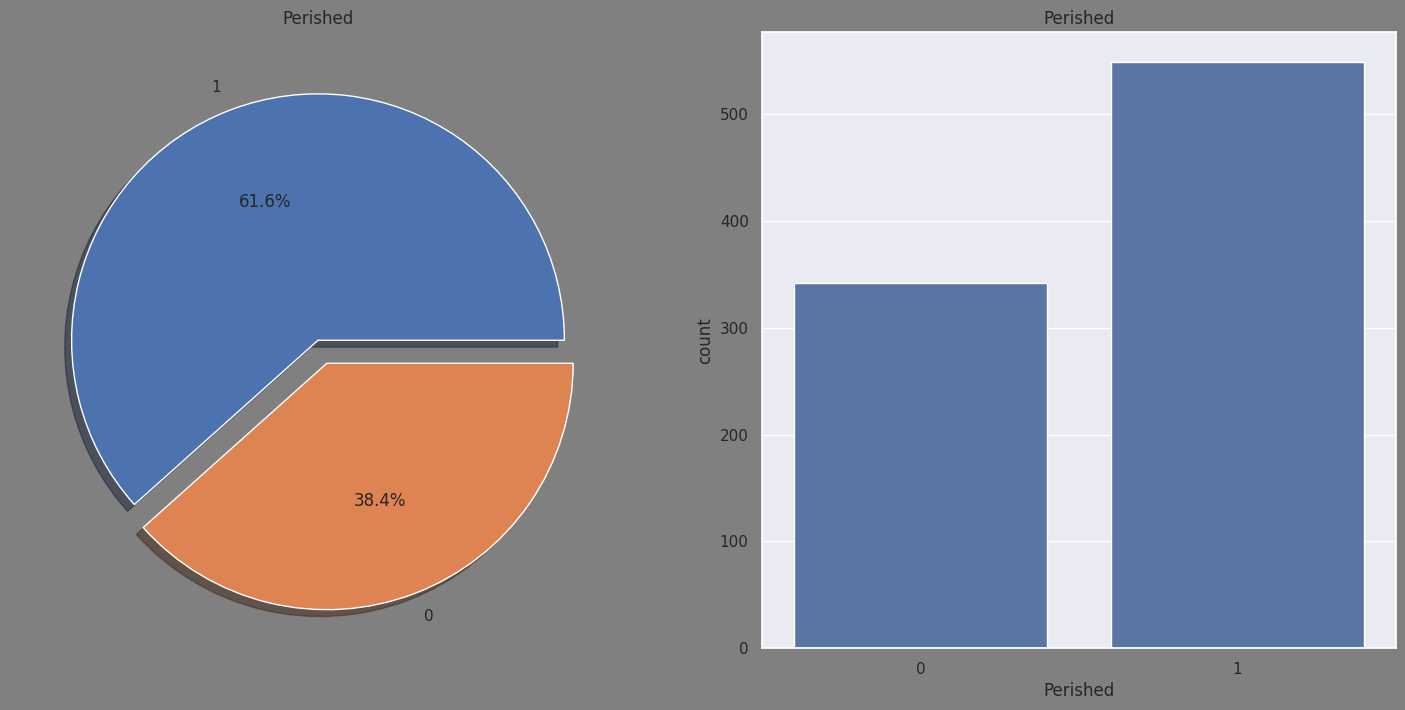

In [794]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df_train['Perished'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Perished')
ax[0].set_ylabel('')
sns.countplot(x='Perished',data=df_train,ax=ax[1])
ax[1].set_title('Perished')
plt.show()

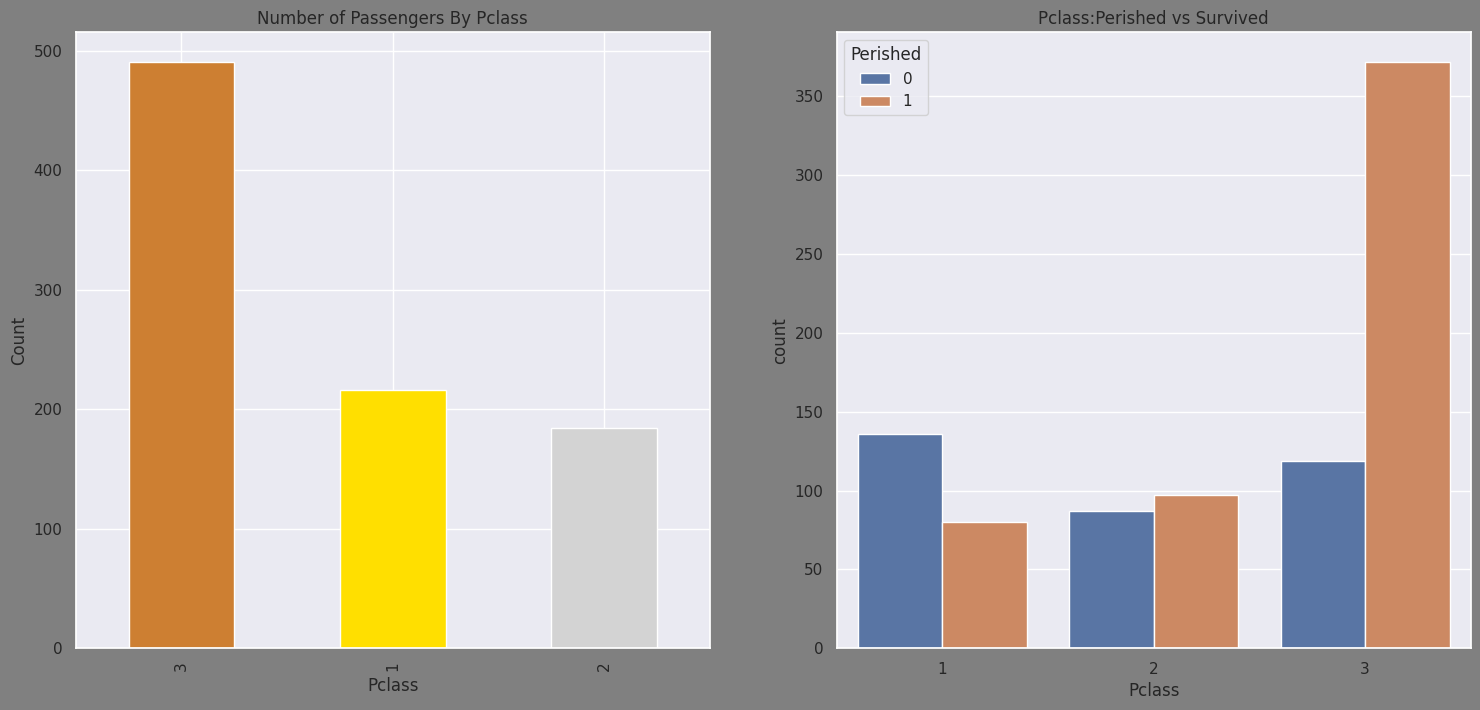

In [795]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Perished',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Perished vs Survived')
plt.show()

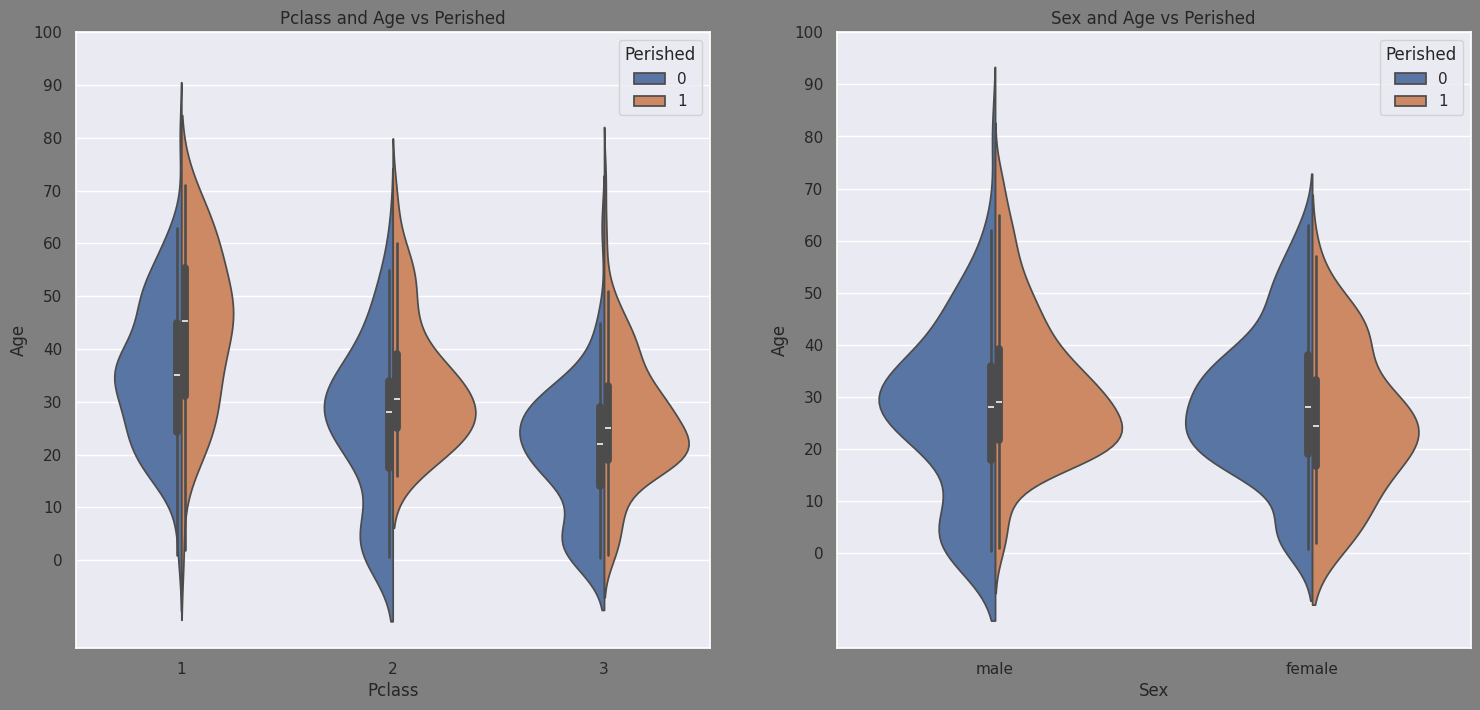

In [796]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
sns.violinplot(x="Pclass",y="Age", hue="Perished", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Perished')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Perished", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Perished')
ax[1].set_yticks(range(0,110,10))
plt.show()

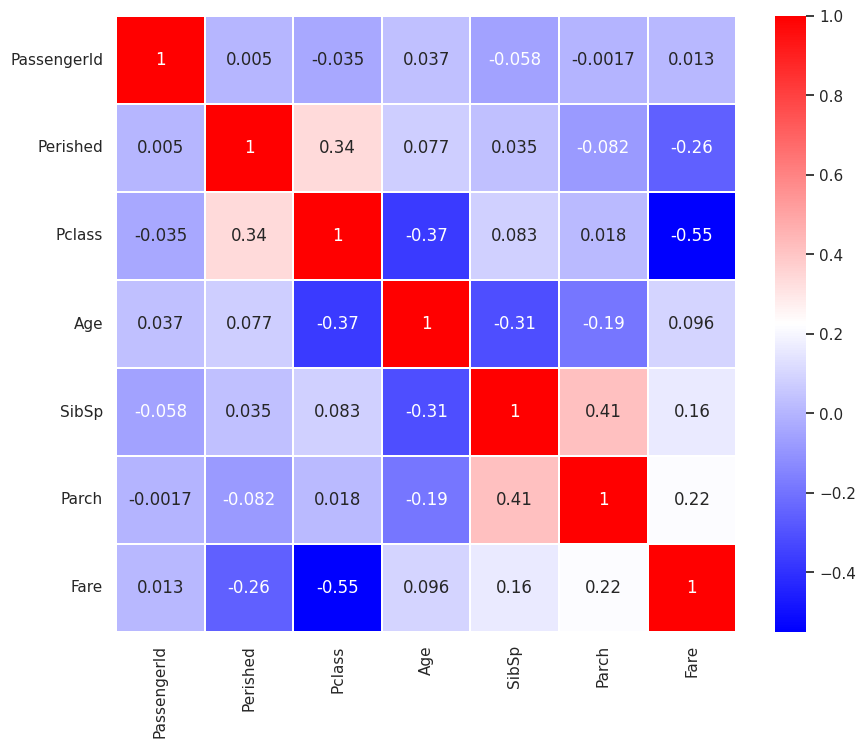

In [797]:
df_numeric = df_train.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


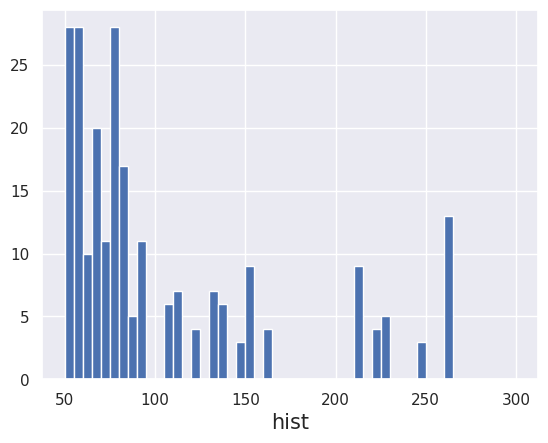

In [798]:
#df_all = pd.concat([df_train, df_test])

# ヒストグラムの描写
# x軸のラベルを指定
plt.xlabel('Fare', fontsize=15)
plt.xlabel('hist', fontsize=15)

#plt.hist(x=df['sepal_length'], bins=25, range=(4.5, 7.5))
plt.hist(x=df_all['Fare'], bins=50, range=(50, 300))

df_train.loc[(df_train['Fare'].values > 200), "Pclass"] = 0
df_test.loc[(df_test['Fare'].values > 200), "Pclass"] = 0
df_all.loc[(df_all['Fare'].values > 200), "Pclass"] = 0

df_all

Pclass 分類．特１等室=0, Fare > 200

In [799]:
df_test[ (df_test['Sex']=='male') & ((df_test.Name.map(lambda x: True if str(x).find('Master.') > 0 else False)))].Age

21      9.00
55     10.00
64     13.00
80      6.00
89      2.00
154    13.00
161     7.00
192    11.50
194     8.00
196     6.00
201     0.33
244      NaN
281     0.75
307     0.83
339      NaN
344      NaN
360    14.50
379     5.00
389     6.00
392    13.00
417      NaN
Name: Age, dtype: float64

In [800]:
import random

#age = pd.concat([df_train['Age'], df_test['Age']])
#fare = pd.concat([df_train['Fare'], df_test['Fare']])

fare = pd.concat([df_train['Fare'], df_test['Fare']])

df_all_Pclass0 = df_all[df_all['Pclass']==0]
df_all_Pclass1 = df_all[df_all['Pclass']==1]
df_all_Pclass2 = df_all[df_all['Pclass']==2]
df_all_Pclass3 = df_all[df_all['Pclass']==3]

Pclass_MasterMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Master.') > 0 else False)))].Age.mean()
Pclass_DrMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Dr.') > 0 else False)))].Age.mean()
Pclass_RevMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Rev.') > 0 else False)))].Age.mean()
Pclass_JonkheerMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Jonkheer.') > 0 else False)))].Age.mean()
Pclass_MajorMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Major.') > 0 else False)))].Age.mean()
Pclass_ColMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Col.') > 0 else False)))].Age.mean()
Pclass_CaptMale_Mean_Age = df_all[ (df_all['Sex']=='male') & ((df_all.Name.map(lambda x: True if str(x).find('Capt.') > 0 else False)))].Age.mean()

print('Pclass_MasterMale_Mean_Age : {}'.format(Pclass_MasterMale_Mean_Age))
print('Pclass_DrMale_Mean_Age : {}'.format(Pclass_DrMale_Mean_Age ))
print('Pclass_RevMale_Mean_Age : {}'.format(Pclass_RevMale_Mean_Age))
print('Pclass_JonkheerMale_Mean_Age : {}'.format(Pclass_JonkheerMale_Mean_Age))
print('Pclass_MajorMale_Mean_Age : {}'.format(Pclass_MajorMale_Mean_Age))
print('Pclass_ColMale_Mean_Age : {}'.format(Pclass_ColMale_Mean_Age))
print('Pclass_CaptMale_Mean_Age : {}'.format(Pclass_CaptMale_Mean_Age))

#Pclass0_MsFemale_Mean_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female') & (df_all_Pclass0.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False))].Age.mean()
#Pclass0_MsFemale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False))].Age.mean()
#Pclass0_MsFemale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False))].Age.mean()
#Pclass0_MsFemale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False))].Age.mean()
#print('Pclass0_MsFemale_Mean_Age : {}'.format(Pclass0_MsFemale_Mean_Age))


#Pclass0
Pclass0_Male_Mean_Age = df_all_Pclass0[df_all_Pclass0['Sex']=='male'].Age.mean()
Pclass0_MrMale_Mean_Age = df_all_Pclass0[(df_all_Pclass0['Sex']=='male') & ((df_all_Pclass0.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.mean()
Pclass0_MrMale_Std_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='male') & ((df_all_Pclass0.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.std()
Pclass0_Male_Mean_Age

Pclass0_Female_Mean_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female')].Age.mean()
Pclass0_MissFemale_Mean_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female') & (df_all_Pclass0.Name.map(lambda x: True if (str(x).find('Miss.') > 0) else False))].Age.mean()
Pclass0_MissFemale_Std_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female') & (df_all_Pclass0.Name.map(lambda x: True if (str(x).find('Miss.') > 0) else False))].Age.std()
Pclass0_MrsFemale_Mean_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female') & (df_all_Pclass0.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.mean()
Pclass0_MrsFemale_Std_Age = df_all_Pclass0[ (df_all_Pclass0['Sex']=='female') & (df_all_Pclass0.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.std()

#Pclass1
Pclass1_Male_Mean_Age = df_all_Pclass1[df_all_Pclass1['Sex']=='male'].Age.mean()
Pclass1_MrMale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='male') & ((df_all_Pclass1.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.mean()
Pclass1_MrMale_Std_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='male') & ((df_all_Pclass1.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.std()
Pclass1_Male_Mean_Age

Pclass1_Female_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female')].Age.mean()

Pclass1_MissFemale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.mean()
Pclass1_MissFemale_Std_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.std()
Pclass1_MrsFemale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.mean()
Pclass1_MrsFemale_Std_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.std()

#Pclass1_MissFemale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Miss') > 0 else False))].Age.mean()
#Pclass1_MrsFemale_Mean_Age = df_all_Pclass1[ (df_all_Pclass1['Sex']=='female') & (df_all_Pclass1.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False))].Age.mean()

#Pclass2
Pclass2_Male_Mean_Age = df_all_Pclass2[df_all_Pclass2['Sex']=='male'].Age.mean()
Pclass2_MrMale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='male') & ((df_all_Pclass2.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.mean()
Pclass2_MrMale_Std_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='male') & ((df_all_Pclass2.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.std()
Pclass2_Male_Mean_Age

Pclass2_Female_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female')].Age.mean()

Pclass2_MissFemale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.mean()
Pclass2_MissFemale_Std_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.std()
Pclass2_MrsFemale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.mean()
Pclass2_MrsFemale_Std_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.std()
#Pclass2_MissFemale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Miss') > 0 else False))].Age.mean()
#Pclass2_MrsFemale_Mean_Age = df_all_Pclass2[ (df_all_Pclass2['Sex']=='female') & (df_all_Pclass2.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False))].Age.mean()

#Pclass3
Pclass3_Male_Mean_Age = df_all_Pclass3[df_all_Pclass3['Sex']=='male'].Age.mean()
Pclass3_MrMale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='male') & ((df_all_Pclass3.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.mean()
Pclass3_MrMale_Std_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='male') & ((df_all_Pclass3.Name.map(lambda x: True if str(x).find('Mr.') > 0 else False)))].Age.std()
Pclass3_Male_Mean_Age

Pclass3_Female_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female')].Age.mean()

Pclass3_MissFemale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.mean()
Pclass3_MissFemale_Std_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False))].Age.std()
Pclass3_MrsFemale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.mean()
Pclass3_MrsFemale_Std_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False))].Age.std()

#Pclass3_MissFemale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Miss') > 0 else False))].Age.mean()
#Pclass3_MrsFemale_Mean_Age = df_all_Pclass3[ (df_all_Pclass3['Sex']=='female') & (df_all_Pclass3.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False))].Age.mean()
#Pclass3_MissFemale_Mean_Age

print('Pclass0_MrMale_Mean_Age: {}, Pclass0_Female_Mean_Age: {}, Pclass0_MrsFemale_Mean_Age: {}, Pclass0_MissFemale_Mean_Age: {}'.format(Pclass0_MrMale_Mean_Age,Pclass0_Female_Mean_Age,Pclass0_MrsFemale_Mean_Age,Pclass0_MissFemale_Mean_Age))
print('Pclass1_MrMale_Mean_Age: {}, Pclass1_Female_Mean_Age: {}, Pclass1_MrsFemale_Mean_Age: {}, Pclass1_MissFemale_Mean_Age: {}'.format(Pclass1_MrMale_Mean_Age,Pclass1_Female_Mean_Age,Pclass1_MrsFemale_Mean_Age,Pclass1_MissFemale_Mean_Age))
print('Pclass2_MrMale_Mean_Age: {}, Pclass2_Female_Mean_Age: {}, Pclass2_MrsFemale_Mean_Age: {}, Pclass2_MissFemale_Mean_Age: {}'.format(Pclass2_MrMale_Mean_Age,Pclass2_Female_Mean_Age,Pclass2_MrsFemale_Mean_Age,Pclass2_MissFemale_Mean_Age))
print('Pclass3_MrMale_Mean_Age: {}, Pclass3_Female_Mean_Age: {}, Pclass3_MrsFemale_Mean_Age: {}, Pclass3_MissFemale_Mean_Age: {}'.format(Pclass3_MrMale_Mean_Age,Pclass3_Female_Mean_Age,Pclass3_MrsFemale_Mean_Age,Pclass3_MissFemale_Mean_Age))

std_range = 0.01

# Pclass == 0 -----
df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = Pclass0_MrMale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass0_MrMale_Mean_Age + random.uniform(-std_range, std_range)*Pclass0_MrMale_Std_Age if x <= 0.0 else 0)
#df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass0_Female_Mean_Age

#df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if (str(x).find('Miss.') > 0 | str(x).find('Ms.') > 0)  else False)), "Age"] = Pclass0_MissFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if (str(x).find('Miss.') > 0 | str(x).find('Ms.') > 0)  else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass0_MissFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass0_MissFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass0_MrsFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass0_MrsFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

df_train.loc[(df_train["Pclass"].values == 0) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass0_Female_Mean_Age


# Pclass == 1 -----
df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = Pclass1_MrMale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = 0.0
#df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass1_MrMale_Mean_Age + random.uniform(-std_range, std_range)*Pclass1_MrMale_Std_Age if x <= 0.0 else 0)
#df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if (str(x).find('Miss.') > 0 ) else False)), "Age"] = Pclass1_MissFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if (str(x).find('Miss.') > 0 ) else False)), "Age"] = 0.0
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass1_MissFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass1_MissFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = Pclass1_MrsFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass1_MrsFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass1_MrsFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass1_Female_Mean_Age

#df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass1_MissFemale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 1) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass1_MrsFemale_Mean_Age

# Pclass == 2 -----
df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = Pclass2_MrMale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = 0.0
#df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass2_MrMale_Mean_Age + random.uniform(-std_range, std_range)*Pclass2_MrMale_Std_Age if x <= 0.0 else 0)
#df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False)), "Age"] = Pclass2_MissFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass2_MissFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass2_MissFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = Pclass2_MrsFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass2_MrsFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass2_MrsFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass2_Female_Mean_Age

#df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass2_MissFemale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 2) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass2_MrsFemale_Mean_Age

# Pclass == 3 -----
df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = Pclass3_MrMale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "male") & (df_train["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass3_MrMale_Mean_Age + random.uniform(-std_range, std_range)*Pclass3_MrMale_Std_Age if x <= 0.0 else 0)
#df_train["Age"] += df_train["AgeX"]

df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass3_Female_Mean_Age

#df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False)), "Age"] = Pclass3_MissFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass3_MissFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass3_MissFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

#df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = Pclass3_MrsFemale_Mean_Age
df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_train["AgeX"] = df_train["Age"].map(lambda x: Pclass3_MrsFemale_Mean_Age + random.uniform(-std_range, std_range)*Pclass3_MrsFemale_Std_Age if x <= 0.0 else 0)
df_train["Age"] += df_train["AgeX"]

df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()), "Age"] = Pclass3_Female_Mean_Age

#df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass3_MissFemale_Mean_Age
#df_train.loc[(df_train["Pclass"].values == 3) & (df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass3_MrsFemale_Mean_Age

df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Master.') > 0 else False)), "Age"]   = Pclass_MasterMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Dr.') > 0 else False)), "Age"]       = Pclass_DrMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Rev.') > 0 else False)), "Age"]      = Pclass_RevMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Jonkheer.') > 0 else False)), "Age"] = Pclass_JonkheerMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Major.') > 0 else False)), "Age"]    = Pclass_MajorMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Col.') > 0 else False)), "Age"]      = Pclass_ColMale_Mean_Age
df_train.loc[(df_train["Sex"].values == "male") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Capt.') > 0 else False)), "Age"]     = Pclass_CaptMale_Mean_Age

#df_train.loc[(df_train["Sex"].values == "female") & (df_train["Age"].isnull()) & (df_train.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False)), "Age"]     = 0.25*(Pclass0_MissFemale_Mean_Age + Pclass1_MissFemale_Mean_Age + Pclass2_MissFemale_Mean_Age + Pclass3_MissFemale_Mean_Age)

#test data ------------------------
# Pclass == 0 -----
df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = Pclass0_MrMale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass0_MrMale_Mean_Age + random.uniform(-0.1, 0.1)*Pclass0_MrMale_Std_Age if x <= 0.0 else 0)
#df_test["Age"] += df_test["AgeX"]

#df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass0_Female_Mean_Age
df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Miss.') > 0 else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass0_MissFemale_Mean_Age + random.uniform(-0.1, 0.1)*Pclass0_MissFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass0_MrsFemale_Mean_Age + random.uniform(-0.1, 0.1)*Pclass0_MrsFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass0_Female_Mean_Age

#df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = (Pclass0_MissFemale_Mean_Age+Pclass0_MrsFemale_Mean_Age)/2
#df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass0_MissFemale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 0) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass0_MrsFemale_Mean_Age

# Pclass == 1 -----
df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = Pclass1_MrMale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass1_MrMale_Mean_Age + random.uniform(-0.1, 0.1)*Pclass1_MrMale_Std_Age if x <= 0.0 else 0)
#df_test["Age"] += df_test["AgeX"]

#df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) , "Age"] = Pclass1_Female_Mean_Age
df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if (str(x).find('Miss.') > 0 | str(x).find('Ms.') > 0) else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass1_MissFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass1_MissFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass1_MrsFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass1_MrsFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass1_Female_Mean_Age

#df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = (Pclass1_MissFemale_Mean_Age+Pclass1_MrsFemale_Mean_Age)/2
#df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass1_MissFemale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 1) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass1_MrsFemale_Mean_Age

# Pclass == 2 -----
df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = Pclass2_MrMale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass2_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass2_MrMale_Std_Age if x <= 0.0 else 0)
#df_test["Age"] += df_test["AgeX"]

#df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass2_Female_Mean_Age
df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if (str(x).find('Miss') > 0 | str(x).find('Ms.') > 0) else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass2_MissFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass2_MissFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass2_MrsFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass2_MrsFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass2_Female_Mean_Age

#df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = (Pclass2_MissFemale_Mean_Age+Pclass2_MrsFemale_Mean_Age)/2
#df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass2_MissFemale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 2) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass2_MrsFemale_Mean_Age

# Pclass == 3 -----
df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = Pclass3_MrMale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "male") & (df_test["Age"].isnull()), "Age"] = 0.0  #.replace(Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age)
#df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass3_MrMale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrMale_Std_Age if x <= 0.0 else 0)
#df_test["Age"] += df_test["AgeX"]

#df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass3_Female_Mean_Age

df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if (str(x).find('Miss.') > 0 | str(x).find('Ms.')) > 0 else False)), "Age"] = 0.0 #Pclass0_MissFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass3_MissFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MissFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs.') > 0 else False)), "Age"] = 0.0 #Pclass0_MrsFemale_Mean_Age
df_test["AgeX"] = df_test["Age"].map(lambda x: Pclass3_MrsFemale_Mean_Age + random.uniform(-1.0, 1.0)*Pclass3_MrsFemale_Std_Age if x <= 0.0 else 0)
df_test["Age"] += df_test["AgeX"]

df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] = Pclass3_Female_Mean_Age

#df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()), "Age"] =  (Pclass3_MissFemale_Mean_Age+Pclass3_MrsFemale_Mean_Age)/2
#df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Miss') > 0 else False)), "Age"] = Pclass3_MissFemale_Mean_Age
#df_test.loc[(df_test["Pclass"].values == 3) & (df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Mrs') > 0 else False)), "Age"] = Pclass3_MrsFemale_Mean_Age

#Update for male
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Master.') > 0 else False)), "Age"]     = Pclass_MasterMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Major.') > 0 else False)), "Age"]      = Pclass_MajorMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Dr.') > 0 else False)), "Age"]         = Pclass_DrMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Rev.') > 0 else False)), "Age"]        = Pclass_RevMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Jonkheer.') > 0 else False)), "Age"]   = Pclass_JonkheerMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Col.') > 0 else False)), "Age"]        = Pclass_ColMale_Mean_Age
df_test.loc[(df_test["Sex"].values == "male") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Capt.') > 0 else False)), "Age"]       = Pclass_CaptMale_Mean_Age

#df_test.loc[(df_test["Sex"].values == "female") & (df_test["Age"].isnull()) & (df_test.Name.map(lambda x: True if str(x).find('Ms.') > 0 else False)), "Age"]     = 0.25*(Pclass0_MissFemale_Mean_Age + Pclass1_MissFemale_Mean_Age + Pclass2_MissFemale_Mean_Age + Pclass3_MissFemale_Mean_Age)

df_train['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)


df_train.drop('AgeX', axis=1,inplace=True)
df_test.drop('AgeX', axis=1,inplace=True)

print(df_train.isnull().sum())
print(df_test.isnull().sum())

#print(Pclass0_MrMale_SbstAge)

Pclass_MasterMale_Mean_Age : 5.482641509433963
Pclass_DrMale_Mean_Age : 42.666666666666664
Pclass_RevMale_Mean_Age : 41.25
Pclass_JonkheerMale_Mean_Age : 38.0
Pclass_MajorMale_Mean_Age : 48.5
Pclass_ColMale_Mean_Age : 54.0
Pclass_CaptMale_Mean_Age : 70.0
Pclass0_MrMale_Mean_Age: 41.55, Pclass0_Female_Mean_Age: 36.416666666666664, Pclass0_MrsFemale_Mean_Age: 46.333333333333336, Pclass0_MissFemale_Mean_Age: 30.466666666666665
Pclass1_MrMale_Mean_Age: 41.442622950819676, Pclass1_Female_Mean_Age: 37.174311926605505, Pclass1_MrsFemale_Mean_Age: 42.724137931034484, Pclass1_MissFemale_Mean_Age: 30.295454545454547
Pclass2_MrMale_Mean_Age: 32.346715328467155, Pclass2_Female_Mean_Age: 27.499223300970876, Pclass2_MrsFemale_Mean_Age: 33.51851851851852, Pclass2_MissFemale_Mean_Age: 20.71708333333333
Pclass3_MrMale_Mean_Age: 28.318910256410255, Pclass3_Female_Mean_Age: 22.185328947368422, Pclass3_MrsFemale_Mean_Age: 32.326530612244895, Pclass3_MissFemale_Mean_Age: 17.36087378640777
PassengerId      

In [801]:
df_train

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.185329,1,2,W./C. 6607,23.4500,NaN,S
889,890,0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [802]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df_train.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [803]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

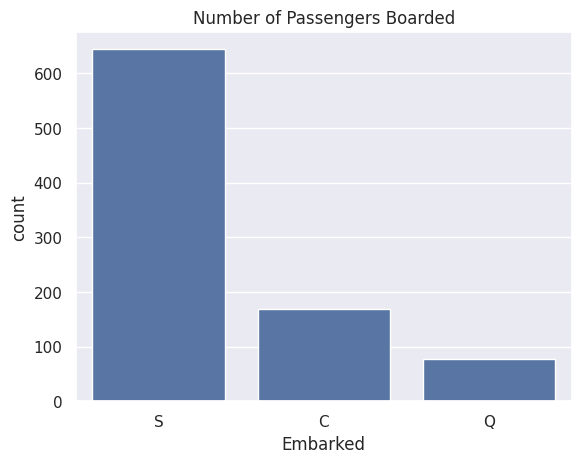

In [804]:
sns.countplot(x='Embarked',data=df_train)
plt.title('Number of Passengers Boarded')
plt.show()

In [805]:
df_train['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df_train.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [806]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df_train.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [807]:
df_train.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_train
#df.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,3,0,22.000000,1,0,7.2500,S
1,2,0,1,1,38.000000,1,0,71.2833,C
2,3,0,3,1,26.000000,0,0,7.9250,S
3,4,0,1,1,35.000000,1,0,53.1000,S
4,5,1,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,1,2,0,27.000000,0,0,13.0000,S
887,888,0,1,1,19.000000,0,0,30.0000,S
888,889,1,3,1,22.185329,1,2,23.4500,S
889,890,0,1,0,26.000000,0,0,30.0000,C


In [808]:
embarked = pd.concat([df_train['Embarked'], df_test['Embarked']])
embarked
embarked_ohe = pd.get_dummies(embarked)
embarked_ohe
embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_train
embarked_ohe_test = embarked_ohe[891:]
embarked_ohe_test
df_train = pd.concat([df_train, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df_train.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df_train.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,1,3,0,22.0,1,0,7.2500,False,False,True
1,2,0,1,1,38.0,1,0,71.2833,True,False,False
2,3,0,3,1,26.0,0,0,7.9250,False,False,True
3,4,0,1,1,35.0,1,0,53.1000,False,False,True
4,5,1,3,0,35.0,0,0,8.0500,False,False,True


In [809]:
pclass = pd.concat([df_train['Pclass'], df_test['Pclass']])
pclass
pclass_ohe = pd.get_dummies(pclass)
pclass_ohe
pclass_ohe_train = pclass_ohe[:891]
pclass_ohe_train
pclass_ohe_test = pclass_ohe[891:]
pclass_ohe_test

df_train = pd.concat([df_train, pclass_ohe_train], axis=1)
df_test = pd.concat([df_test, pclass_ohe_test], axis=1)

df_train.drop('Pclass', axis=1, inplace=True)
df_test.drop('Pclass', axis=1, inplace=True)

df_train.head()

,PassengerId,Perished,Sex,Age,SibSp,Parch,Fare,C,Q,S,0,1,2,3
0,1,1,0,22.0,1,0,7.2500,False,False,True,False,False,False,True
1,2,0,1,38.0,1,0,71.2833,True,False,False,False,True,False,False
2,3,0,1,26.0,0,0,7.9250,False,False,True,False,False,False,True
3,4,0,1,35.0,1,0,53.1000,False,False,True,False,True,False,False
4,5,1,0,35.0,0,0,8.0500,False,False,True,False,False,False,True


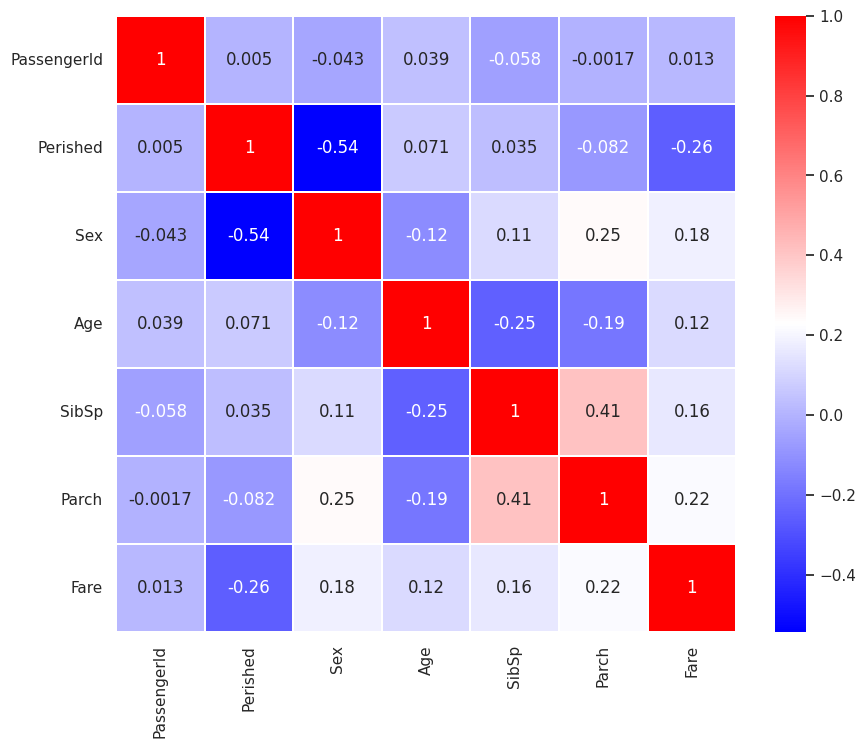

In [810]:
df_numeric = df_train.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##2. ベースラインモデルの構築

In [811]:
X = df_train.iloc[:, 2:].values
y = df_train.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values
df_test.isnull().sum()


PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
0              0
1              0
2              0
3              0
dtype: int64

In [812]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
sc.fit(X_valid)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_valid_std = sc.transform(X_valid)

Random Forest
*   max_depth：決定木の深さの最大値
*   min_samples_leaf：葉が含むサンプル数の最小値
*   n_estimators：決定木の数
*   n_jobs：計算に用いるスレッド数
*   random_state：乱数生成のシード値



In [813]:

#rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)

#rfc.fit(X_train, y_train)
rfc.fit(X_train_std, y_train)


RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [814]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.579
 Test Score: 0.537


In [815]:
param_grid = {'max_depth': [3, 5, 7, 9, 11, 13], #add 9,11,13
              'min_samples_leaf': [1, 2, 4, 8, 16]} # add 8,16

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                            n_estimators=100, n_jobs=-1, random_state=42)
        #rfc_grid.fit(X_train, y_train)
        rfc_grid.fit(X_train_std, y_train)

        #print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        ##print('    Train Score: {}, Test Score: {}, diff: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
        #                                                   round(rfc_grid.score(X_valid, y_valid), 3),
        #                                                  round(rfc_grid.score(X_train, y_train) - rfc_grid.score(X_valid, y_valid),3)))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train_std, y_train), 3),
                                                           round(rfc_grid.score(X_valid_std, y_valid), 3)))

    Train Score: 0.822, Test Score: 0.784
    Train Score: 0.825, Test Score: 0.784
    Train Score: 0.823, Test Score: 0.78
    Train Score: 0.807, Test Score: 0.784
    Train Score: 0.804, Test Score: 0.776
    Train Score: 0.856, Test Score: 0.81
    Train Score: 0.852, Test Score: 0.799
    Train Score: 0.849, Test Score: 0.802
    Train Score: 0.841, Test Score: 0.81
    Train Score: 0.838, Test Score: 0.802
    Train Score: 0.896, Test Score: 0.791
    Train Score: 0.883, Test Score: 0.795
    Train Score: 0.857, Test Score: 0.81
    Train Score: 0.849, Test Score: 0.802
    Train Score: 0.828, Test Score: 0.799
    Train Score: 0.929, Test Score: 0.799
    Train Score: 0.894, Test Score: 0.795
    Train Score: 0.872, Test Score: 0.802
    Train Score: 0.852, Test Score: 0.799
    Train Score: 0.83, Test Score: 0.799
    Train Score: 0.961, Test Score: 0.776
    Train Score: 0.905, Test Score: 0.776
    Train Score: 0.87, Test Score: 0.802
    Train Score: 0.857, Test Score: 0.79

# Cross Validation

In [816]:
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=7) #default:5
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1}
CV Score: 0.833


#3. 特徴量エンジニアリング

In [817]:
df_fe_train = df_train.copy()
df_fe_test = df_test.copy()

#df_fe_train['Family'] = df_train['SibSp'] + df_train['Parch']
#df_fe_test['Family'] = df_test['SibSp'] + df_test['Parch']

#df_train.drop('SibSp', axis=1, inplace=True)
#df_test.drop('SibSp', axis=1, inplace=True)

#df_train.drop('Parch', axis=1, inplace=True)
#df_test.drop('Parch', axis=1, inplace=True)

df_fe_train.head(10)

,PassengerId,Perished,Sex,Age,SibSp,Parch,Fare,C,Q,S,0,1,2,3
0,1,1,0,22.00000,1,0,7.2500,False,False,True,False,False,False,True
1,2,0,1,38.00000,1,0,71.2833,True,False,False,False,True,False,False
2,3,0,1,26.00000,0,0,7.9250,False,False,True,False,False,False,True
3,4,0,1,35.00000,1,0,53.1000,False,False,True,False,True,False,False
4,5,1,0,35.00000,0,0,8.0500,False,False,True,False,False,False,True
5,6,1,0,28.31891,0,0,8.4583,False,True,False,False,False,False,True
6,7,1,0,54.00000,0,0,51.8625,False,False,True,False,True,False,False
7,8,1,0,2.00000,3,1,21.0750,False,False,True,False,False,False,True
8,9,0,1,27.00000,0,2,11.1333,False,False,True,False,False,False,True
9,10,0,1,14.00000,1,0,30.0708,True,False,False,False,False,True,False


Random Forest

In [818]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler

X_fe_train = df_fe_train.iloc[:, 2:].values
y_fe_train = df_fe_train.iloc[:, 1].values #Perished

X_fe_test = df_fe_test.iloc[:, 1:].values

X_fe_train, X_fe_valid, y_fe_train, y_fe_valid = train_test_split(X_fe_train, y_fe_train, test_size=0.3, random_state=42)

# 標準化
sc = StandardScaler()
sc.fit(X_fe_train)
X_fe_train_std = sc.transform(X_fe_train)
X_fe_valid_std = sc.transform(X_fe_valid)


#rfc_fe_train = RandomForestClassifier(max_depth=7, min_samples_leaf=6, n_estimators=100, n_jobs=-1, random_state=42)
rfc_fe_train = RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=100, n_jobs=-1, random_state=42)

#rfc_fe_train.fit(X_fe_train, y_fe_train)
rfc_fe_train.fit(X_fe_train_std, y_fe_train)

#print('Train Score: {}'.format(round(rfc_fe_train.score(X_fe_train, y_fe_train), 3)))
#print(' Test Score: {}'.format(round(rfc_fe_train.score(X_fe_valid, y_fe_valid), 3)))

print('Train Score: {}'.format(round(rfc_fe_train.score(X_fe_train_std, y_fe_train), 3)))
print(' Test Score: {}'.format(round(rfc_fe_train.score(X_fe_valid_std, y_fe_valid), 3)))

Train Score: 0.894
 Test Score: 0.795


In [819]:
# SVMのライブラリ
#from sklearn.svm import LinearSVC

# 標準化
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

# クラスの初期化と学習
#svm= LinearSVC()
#svm.fit(X_train_std, y_train)

# 訓練データとテストデータのスコア
#print('正解率(train):{:.3f}'.format(svm.score(X_train_std, y_train)))
#print('正解率(test):{:.3f}'.format(svm.score(X_test_std, y_valid)))

#4. 様々なモデルの構築・調整

Logistic Regression

In [820]:
lr = LogisticRegression(random_state=42)
#lr.fit(X_train, y_train)
lr.fit(X_train_std, y_train)


print('Logistic Regression \n')
#print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
#print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))

print('Train Score: {}'.format(round(lr.score(X_train_std, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid_std, y_valid), 3)))


Logistic Regression 

Train Score: 0.812
 Test Score: 0.817


多層パーセプトロンモデル

In [821]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
#mlpc.fit(X_train, y_train)
mlpc.fit(X_train_std, y_train)

print('Multilayer Perceptron \n')
#print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
#print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))

print('Train Score: {}'.format(round(mlpc.score(X_train_std, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid_std, y_valid), 3)))



Multilayer Perceptron 

Train Score: 0.886
 Test Score: 0.78


#5. モデルのアンサンブリング

In [822]:
X_test_std

array([[-0.778,  0.293, -0.523, ..., -0.589, -0.491,  0.963],
       [ 1.286,  1.236,  0.787, ..., -0.589, -0.491,  0.963],
       [-0.778,  2.367, -0.523, ..., -0.589,  2.038, -1.038],
       ...,
       [-0.778,  0.595, -0.523, ..., -0.589, -0.491,  0.963],
       [-0.778, -0.173, -0.523, ..., -0.589, -0.491,  0.963],
       [-0.778, -0.173,  0.787, ..., -0.589, -0.491,  0.963]])

In [823]:
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)
mlpc_pred = mlpc.predict_proba(X_test)

#rfc_pred = rfc.predict_proba(X_test_std)
#lr_pred = lr.predict_proba(X_test_std)
#mlpc_pred = mlpc.predict_proba(X_test_std)
#svm_pred = svm.predict_proba(X_test_std)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 3
#pred_proba
pred = pred_proba.argmax(axis=1)
#mlpc_pred
#pred = rfc_pred
pred_kaggle = np.array(pred)

#for k np.range(pred.size):
for k in range(0,len(pred_kaggle)):
  if pred_kaggle[k] == 1:
    pred_kaggle[k] = 0
  else :
    pred_kaggle[k] = 1

pred_kaggle

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

#6. 予測の出力・提出

In [824]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
#path = '/content/drive/My Drive/Colab Notebooks/GCI_2024_Summer/Competitions/competition_1/'
path = "/content/drive/MyDrive/data/"
submission = pd.read_csv(path + 'gender_submission.csv')
submission

submission_kaggle = pd.read_csv(path + 'gender_submission.csv')
submission_kaggle


,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [825]:
pred.shape

(418,)

In [826]:
pred_kaggle.shape

(418,)

In [827]:
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,0


In [828]:
submission_kaggle['Survived'] = pred_kaggle
submission_kaggle.drop('Perished', axis=1, inplace=True)
submission_kaggle

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [829]:
# JupyterLabなどローカルで作業する場合
# パスは必要に応じて変更の必要あり
#submission.to_csv('/content/drive/My Drive/Colab Notebooks/GCI_2024_Summer/Competitions/competition_1/submission.csv', index=False)

submission.to_csv('/content/drive/MyDrive/data/submission.csv', index=False)
submission_kaggle.to_csv('/content/drive/MyDrive/data/submission_kaggle.csv', index=False)

In [830]:
# Google Drive・Google Colaboratoryで作業する場合
#submission.to_csv('submission.csv',index=False)
submission_kaggle.to_csv('submission_kaggle.csv',index=False)

from google.colab import files
#files.download('submission.csv')
files.download('submission_kaggle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>